# Graded Challenge 1

`MARWAN MUSA - BATCH 12`

## Description

### Objective

I'm an employee at a new start-up - mobile gaming company, we are building a monster game that likely will have the same visual and experience with a pokemon game. My division's job is to get some specific information from a pokemon dataset that has been spread across the internet, in order to improve our monster figure in our own game.

### Problem Statements

My duties are:
- To find out the dominant strength of each pokemon type.
- To classify the pokemons' power difference by the strongest and the weakest of *legendary* and *non-legendary* type.
- To find out the pokemons' hit points, speed, and total power differences by its *generation*.

## Working Area

### ***Importing Module***

In [92]:
import numpy as np
import pandas as pd

---

### ***Loading Data***

In [93]:
df = pd.read_csv('Pokemon.csv')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


---

### ***Cleaning Data***

We will update the name of some columns, in order to make it easy to use.

In [94]:
pokemon = df.rename(
    columns={"Type 1": "Type_1", "Type 2": "Type_2", "Sp. Atk": "Sp_Atk", "Sp. Def": "Sp_Def"}
)
pokemon

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [95]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type_1      800 non-null    object
 3   Type_2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp_Atk      800 non-null    int64 
 9   Sp_Def      800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


It seems like the column of *"type 2"* doesn't have the same value with the total entries, where it should be 800 data in it, but *"type 2"* just have 414 data.

Replacing NaN values in *type 2* column with string value "No Type"

In [96]:
pokemon[['Type_2']] = pokemon[['Type_2']].fillna('No Type')
pokemon

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,No Type,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [97]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type_1      800 non-null    object
 3   Type_2      800 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp_Atk      800 non-null    int64 
 9   Sp_Def      800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


It can be seen that the dataset has no missing value.

---

### ***Exploring the Dataset***

>How many of them are *single type* or *dual type* pokemon?

We can find it by filtering *Type_2* column that has "No Type" value

In [98]:
pokemon[pokemon.Type_2 == 'No Type']

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
4,4,Charmander,Fire,No Type,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,No Type,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,No Type,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,No Type,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,No Type,530,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,705,Sliggoo,Dragon,No Type,452,68,75,53,83,113,60,6,False
776,706,Goodra,Dragon,No Type,600,90,100,70,110,150,80,6,False
788,712,Bergmite,Ice,No Type,304,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,No Type,514,95,117,184,44,46,28,6,False


Based on table above, we can conclude that 386 pokemons are *single type* because they don't have a second power and the rest are *dual type*. 

>What is the dominant strength of each pokemon's type?

In [99]:
pokemon.Type_1.value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type_1, dtype: int64

*Water* strength is the most common ability that pokemons have in type 1.

In [100]:
pokemon[pokemon['Type_2'] != 'No Type'].Type_2.value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type_2, dtype: int64

*Flying* strength is the most common ability that pokemons have in type 2.

>How many pokemons are *legendary* and *non legendary*?

In [101]:
pokemon.Legendary.value_counts()

False    735
True      65
Name: Legendary, dtype: int64

We can see that 65 pokemons are *legendary* and 735 are *non-legendary*.

>Total power of *legendary* and *non-legendary* pokemon

#### **Legendary**

In [102]:
pokemon[pokemon['Legendary'] == True].Total.agg(('min','max'))

min    580
max    780
Name: Total, dtype: int64

- The strongest legendary pokemon has 780 total power, and
- The weakest legendary pokemon has 580 total power.

Here they are:

In [103]:
pokemon[
    (pokemon["Legendary"] == True) &
    (pokemon["Total"] == 580)
]

# the weakest legendary pokemons

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
262,243,Raikou,Electric,No Type,580,90,85,75,115,100,115,2,True
263,244,Entei,Fire,No Type,580,115,115,85,90,75,100,2,True
264,245,Suicune,Water,No Type,580,100,75,115,90,115,85,2,True
414,377,Regirock,Rock,No Type,580,80,100,200,50,100,50,3,True
415,378,Regice,Ice,No Type,580,80,50,100,100,200,50,3,True
416,379,Registeel,Steel,No Type,580,80,75,150,75,150,50,3,True
537,480,Uxie,Psychic,No Type,580,75,75,130,75,130,95,4,True


In [104]:
pokemon[
    (pokemon["Legendary"] == True) &
    (pokemon["Total"] == 780)
]

# the strongest legendary pokemons

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,No Type,780,106,150,70,194,120,140,1,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True


#### **Non-Legendary**

In [105]:
pokemon[pokemon['Legendary'] == False].Total.agg(('min','max'))

min    180
max    700
Name: Total, dtype: int64

- The strongest non-legendary pokemon has 700 total power, and
- The weakest non-legendary pokemon has 180 total power.

Here they are:

In [106]:
pokemon[
    (pokemon["Legendary"] == False) &
    (pokemon["Total"] == 180)
]

# the weakest non-legendary pokemons

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
206,191,Sunkern,Grass,No Type,180,30,30,30,30,30,30,2,False


In [107]:
pokemon[
    (pokemon["Legendary"] == False) &
    (pokemon["Total"] == 700)
]

# the strongest non-legendary pokemons

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
268,248,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
409,373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
413,376,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False
494,445,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False


>HP, Speed and Total power by pokemon's generation

#### **Hit Points**

In [108]:
pokemon.groupby("Generation", sort=False)["HP"].max()

Generation
1    250
2    255
3    170
4    150
5    165
6    126
Name: HP, dtype: int64

#### **Speed**

In [109]:
pokemon.groupby("Generation", sort=False)["Speed"].max()

Generation
1    150
2    130
3    180
4    135
5    145
6    126
Name: Speed, dtype: int64

#### **Total Power**

In [110]:
pokemon.groupby("Generation", sort=False)["Total"].agg(('min','max'))

,min,max
Generation,,
1,195,780
2,180,700
3,190,780
4,194,720
5,255,700
6,200,700


Have a look at the *hp*, *speed* and *total power* data above in a different way:

#### **Hit Points**

<AxesSubplot:title={'center':'Maximum HP for Each Generation'}, xlabel='Generation', ylabel='Hit Points'>

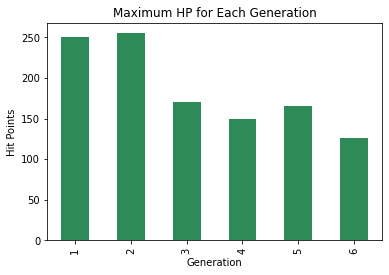

In [111]:
pokemon.groupby("Generation", sort=False)["HP"].max().plot(
    kind = 'bar', 
    color = 'seagreen', 
    title = 'Maximum HP for Each Generation',
    ylabel = 'Hit Points')

#### **Speed**

<AxesSubplot:title={'center':'Maximum Speed for Each Generation'}, xlabel='Generation', ylabel='Speed'>

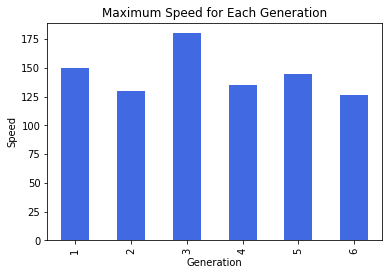

In [112]:
pokemon.groupby("Generation", sort=False)["Speed"].max().plot(
    kind = 'bar', 
    color = 'royalblue', 
    title = 'Maximum Speed for Each Generation',
    ylabel = 'Speed')

#### **Total Power**

<AxesSubplot:title={'center':'The Highest and The Lowest Total Power for Each Generation'}, xlabel='Generation', ylabel='Total Power'>

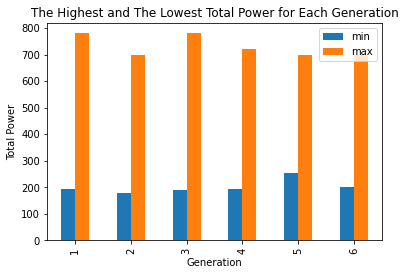

In [113]:
pokemon.groupby("Generation", sort=False)["Total"].agg(('min','max')).plot(
    kind = 'bar', 
    title = 'The Highest and The Lowest Total Power for Each Generation',
    ylabel = 'Total Power')

## Conclusions, Assumptions, Overall Analysis

In accordance with the result, it is found that:
- the dominant strength of pokemons' *first power* is *water strength*, and if they have second power or if they are *dual type pokemon*, then most of them are *flying pokemons*.

- The strongest *legendary* and *non-legendary* type has only 80 points difference of their total power value. The total power of the strongest *legendary* and *non-legendary* pokemon is 780 and 700 respectively. While The weakest *legendary* and *non-legendary* type is up to 400 points difference of their total power value. The total power of the weakest *legendary* and *non-legendary* pokemon is 580 and 180 respectively.

- According to the generations, 
1. Most pokemons with the highest damage resistance based on their hit points are from the *first* and *second generation* with only 5 points difference.
2. The fastest pokemon based on their speed is found in the *third generation*.
3. The *most powerful* pokemons are from the *first* and *third generation*. It can be seen from the highest value of the total power of all generation is found in the *first* and *third generation*. Otherwise, the *most delicate* pokemon is from the *second generation*. 
 